In [2]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
conn = psycopg2.connect(dbname = "postgres",
                  user = "postgres",
                  password = "password",
                  host = "localhost",
                  port = "5432")

In [4]:
cursor = conn.cursor()

select upper(CONCAT(first_name,' ',last_name)) as "Actor Name"
	from  actor

	
select last_name
	 from actor
	 where last_name like '%LI%'
	 
select last_name, count(*) total
	from actor
  group by last_name
	order by last_name desc
   
select first_name,last_name,address,sum(amount)
    from staff
  	JOIN address ON staff.address_id= address.address_id
    JOIN payment on staff.staff_id= payment.staff_id
  	group by first_name,last_name,address

  
select actor, title 
	from film_actor
    join film on film_actor.film_id= film.film_id
    join actor on film_actor.actor_id=actor.actor_id
    WHERE title='ALONE TRIP'
   

select CONCAT(first_name,' ',last_name) as "Customer Name",count(rental_id) as amount
  from customer
  inner join rental on customer.customer_id=rental.customer_id
  group by "Customer Name" 
  order by  amount desc
  limit 1;

  SELECT
    store.store_id,COUNT(rental.rental_id) AS rental_count 
    from store 
    join inventory on store.store_id = inventory.store_id
    join rental ON inventory.inventory_id= rental.inventory_id
    join film on inventory.film_id = film.film_id
    join film_category ON film.film_id = film_category.film_id
    join category on film_category.category_id = category.category_id
    WHERE category.name = 'Family'
    GROUP BY store.store_id
    ORDER BY rental_count DESC
LIMIT 1;

# Create a graphic to display the top 20 rented films.  Then do the same for the bottom 20


In [5]:
cursor.execute("select  title, count(rental_id) as rental_count from film  inner join inventory on film.film_id=inventory.film_id inner join rental on inventory.inventory_id=rental.inventory_id group by title order by rental_count desc limit 20;")
rows = cursor.fetchall()
for row in rows:
    print(row)
df = pd.DataFrame(rows)
df.columns = ["Film Name","Count"]
print(df)

('BUCKET BROTHERHOOD', 34)
('ROCKETEER MOTHER', 33)
('FORWARD TEMPLE', 32)
('SCALAWAG DUCK', 32)
('RIDGEMONT SUBMARINE', 32)
('GRIT CLOCKWORK', 32)
('JUGGLER HARDLY', 32)
('APACHE DIVINE', 31)
('NETWORK PEAK', 31)
('TIMBERLAND SKY', 31)
('GOODFELLAS SALUTE', 31)
('WIFE TURN', 31)
('ROBBERS JOON', 31)
('ZORRO ARK', 31)
('RUSH GOODFELLAS', 31)
('HOBBIT ALIEN', 31)
('PULP BEVERLY', 30)
('DOGMA FAMILY', 30)
('SUSPECTS QUILLS', 30)
('GRAFFITI LOVE', 30)
              Film Name  Count
0    BUCKET BROTHERHOOD     34
1      ROCKETEER MOTHER     33
2        FORWARD TEMPLE     32
3         SCALAWAG DUCK     32
4   RIDGEMONT SUBMARINE     32
5        GRIT CLOCKWORK     32
6        JUGGLER HARDLY     32
7         APACHE DIVINE     31
8          NETWORK PEAK     31
9        TIMBERLAND SKY     31
10    GOODFELLAS SALUTE     31
11            WIFE TURN     31
12         ROBBERS JOON     31
13            ZORRO ARK     31
14      RUSH GOODFELLAS     31
15         HOBBIT ALIEN     31
16         PULP BEVE

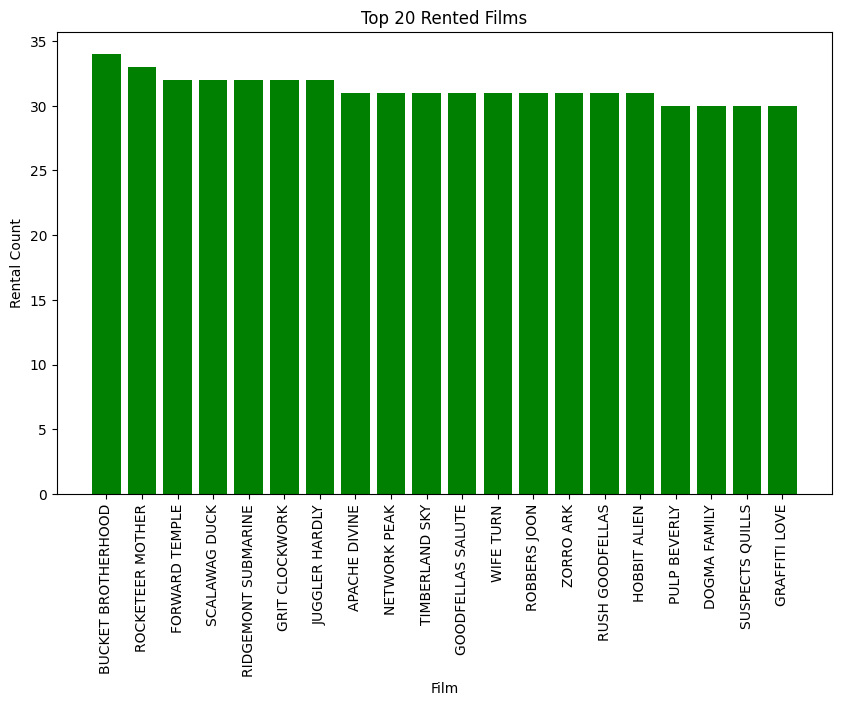

In [6]:
plt.figure(figsize=(10,6))
plt.xticks(rotation='vertical')
plt.bar(df["Film Name"], df["Count"], color ='green')

plt.xlabel("Film")
plt.ylabel("Rental Count")
plt.title("Top 20 Rented Films")
plt.show()

In [7]:
cursor.execute("select  title, count(rental_id) as rental_count from film  inner join inventory on film.film_id=inventory.film_id inner join rental on inventory.inventory_id=rental.inventory_id group by title order by rental_count  limit 20;")
rows = cursor.fetchall()
df = pd.DataFrame(rows)
df.columns = ["Film Name","Count"]
print(df)


              Film Name  Count
0        HARDLY ROBBERS      4
1           MIXED DOORS      4
2           TRAIN BUNCH      4
3          FEVER EMPIRE      5
4          PRIVATE DROP      5
5    MUSSOLINI SPOILERS      5
6        TRAFFIC HOBBIT      5
7       FULL FLATLINERS      5
8     FREEDOM CLEOPATRA      5
9           BUNCH MINDS      5
10      INFORMER DOUBLE      5
11          SEVEN SWARM      5
12     BRAVEHEART HUMAN      5
13    CONSPIRACY SPIRIT      5
14          GLORY TRACY      5
15         HUNTER ALTER      5
16      MANNEQUIN WORST      5
17     RUSHMORE MERMAID      6
18       FRONTIER CABIN      6
19  LADYBUGS ARMAGEDDON      6


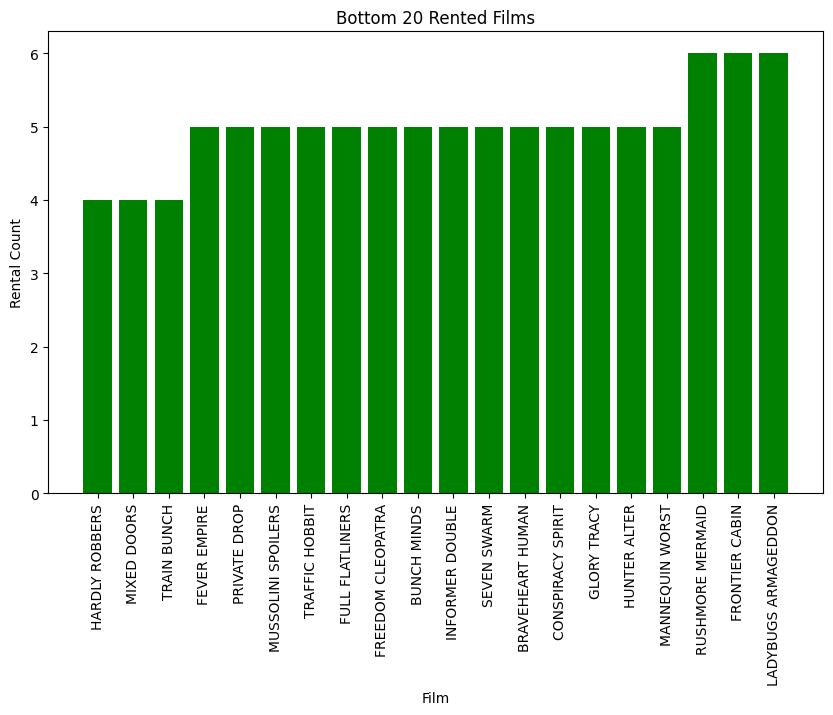

In [8]:
plt.figure(figsize=(10,6))
plt.xticks(rotation='vertical')
plt.bar(df["Film Name"], df["Count"], color ='green')

plt.xlabel("Film")
plt.ylabel("Rental Count")
plt.title("Bottom 20 Rented Films")
plt.show()

# Create a graphic that compares the amount of sales each store has brought in.

In [9]:
cursor.execute("SELECT  store_id, sum(amount) from inventory inner join rental on inventory.inventory_id=rental.inventory_id inner join payment on rental.rental_id= payment.rental_id group by store_id")
rows = cursor.fetchall()

for row in rows:
    print(row)

(1, Decimal('33689.74'))
(2, Decimal('33726.77'))


In [10]:
df = pd.DataFrame(rows)
df.columns = ["store","Amount"]
print(df)

   store    Amount
0      1  33689.74
1      2  33726.77


([<matplotlib.patches.Wedge at 0x1301d1c70>,
 [Text(0.0009491504947249811, 1.0999995905059867, '33689.74'),
  Text(-0.0009491504947256043, -1.0999995905059867, '33726.77')])

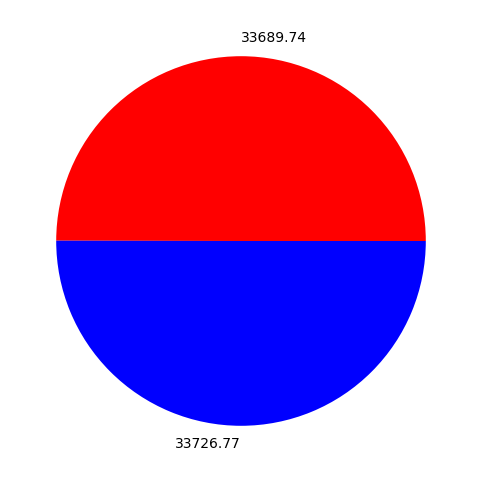

In [11]:
'''plt.bar(df["store"], df["Amount"], color ='maroon')
 
plt.xlabel("store")
plt.ylabel("Rental Amount")
plt.title("Each store amount")
plt.show()'''
colors = ['red',  'blue'] 
plt.figure(figsize=(10,6))
# Plotting the pie chart for above dataframe 
plt.pie(df["Amount"], labels = df["Amount"],colors=colors )


# Create a python function that will display a graphic the showcases the top N genres by gross revenue.


         Genere Gross Revenue
0        Sports       5314.21
1        Sci-Fi       4756.98
2     Animation       4656.30
3         Drama       4587.39
4        Comedy       4383.58
5        Action       4375.85
6           New       4361.57
7         Games       4281.33
8       Foreign       4270.67
9        Family       4226.07
10  Documentary       4217.52
11       Horror       3722.54
12     Children       3655.55
13     Classics       3639.59
14       Travel       3549.64
15        Music       3417.72


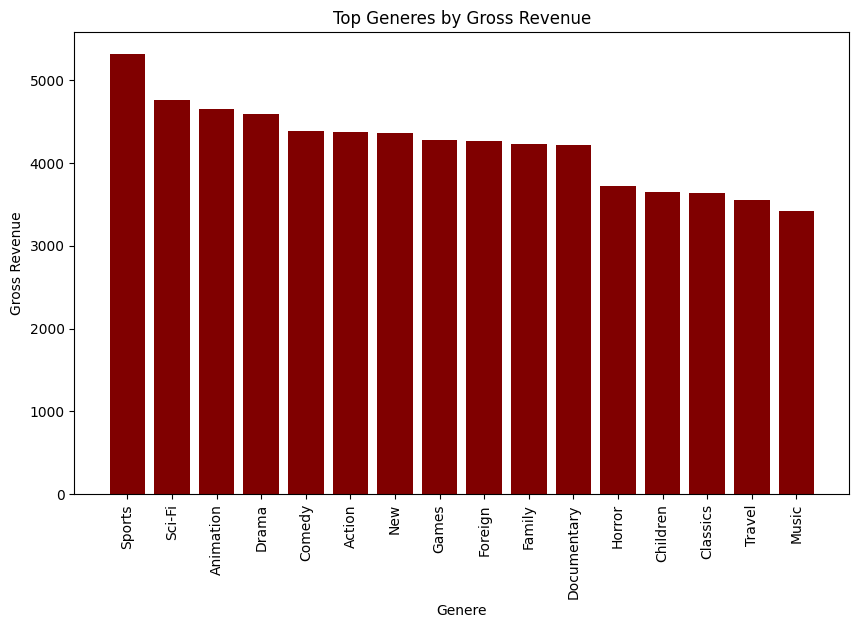

In [12]:
cursor.execute("select name ,sum(amount) as gross_revenue from category join film_category on category.category_id=film_category.category_id join film on film_category.film_id=film.film_id join inventory on film.film_id=inventory.film_id join rental on inventory.inventory_id= rental.inventory_id join payment on rental.rental_id=payment.rental_id group by name order by gross_revenue desc")
rows = cursor.fetchall()
df = pd.DataFrame(rows)
df.columns = ["Genere","Gross Revenue"]
print(df)
plt.figure(figsize=(10,6))
plt.xticks(rotation='vertical')
plt.bar(df["Genere"], df["Gross Revenue"], color ='maroon')
 
plt.xlabel("Genere")
plt.ylabel("Gross Revenue")
plt.title("Top Generes by Gross Revenue")
plt.show()

# Create a graphic showing the average replacement cost by category

         Genere avg_replacement_cost
0       Foreign  18.6475342465753425
1        Comedy  19.0244827586206897
2        Travel  19.0250877192982456
3           New  19.4185714285714286
4         Music  19.4409803921568627
5   Documentary  19.6223529411764706
6        Family  19.7291304347826087
7        Horror  19.8650000000000000
8      Children  20.0566666666666667
9     Animation  20.1263636363636364
10        Games  20.2850819672131148
11       Sports  20.3954054054054054
12       Action  20.9118750000000000
13     Classics  21.0075438596491228
14        Drama  21.0867741935483871
15       Sci-Fi  21.1539344262295082


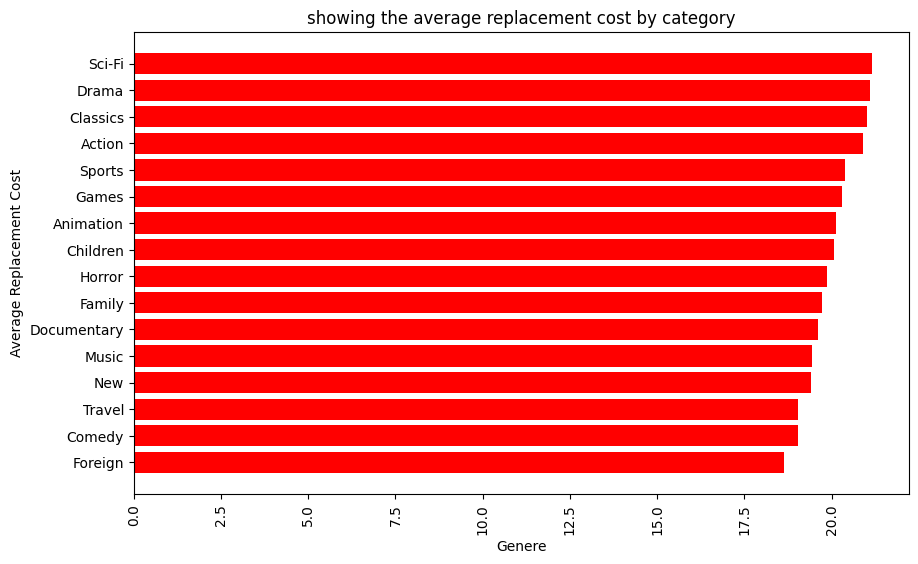

In [13]:
cursor.execute("select name, avg (replacement_cost) as avg_replacement_cost from category join film_category on category.category_id=film_category.category_id join film on film_category.film_id=film.film_id group by name order by avg_replacement_cost")
rows = cursor.fetchall()
df = pd.DataFrame(rows)
df.columns = ["Genere","avg_replacement_cost"]
print(df)
plt.figure(figsize=(10,6))
plt.xticks(rotation='vertical')
plt.barh(df["Genere"], df["avg_replacement_cost"],color ='red') 
plt.xlabel("Genere")
plt.ylabel("Average Replacement Cost")
plt.title("showing the average replacement cost by category")
plt.show() 


# Create a pie chart showing the percentage of films in each rating category (G, PG, PG-13, etc.)

('G', 178)
('PG-13', 223)
('R', 195)
('NC-17', 210)
('PG', 194)
  Rating  Percentage
0      G         178
1  PG-13         223
2      R         195
3  NC-17         210
4     PG         194


([<matplotlib.patches.Wedge at 0x1301976e0>,
 [Text(0.9324457240113389, 0.583562311816802, 'G'),
  Text(-0.27021038544984305, 1.066295619232794, 'PG-13'),
  Text(-1.0999511461071534, 0.010367071792940389, 'R'),
  Text(-0.33333881269212695, -1.048277270550594, 'NC-17'),
  Text(0.9019473089387411, -0.6296753543677592, 'PG')],
 [Text(0.5086067585516393, 0.31830671553643736, '18%'),
  Text(-0.14738748297264165, 0.5816157923087966, '22%'),
  Text(-0.5999733524220836, 0.005654766432512939, '19%'),
  Text(-0.18182117055934194, -0.5717876021185058, '21%'),
  Text(0.49197125942113146, -0.3434592842005959, '19%')])

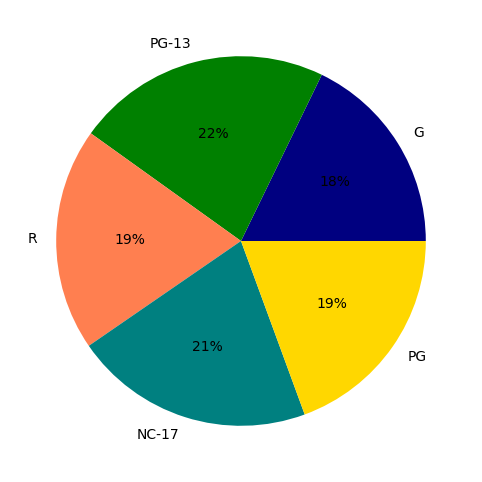

In [14]:
cursor.execute("select  rating, count(*) as total_count from film group by rating")
rows = cursor.fetchall()

for row in rows:
    print(row)
df = pd.DataFrame(rows)
df.columns = ["Rating","Percentage"]
print(df)
plt.figure(figsize=(10,6))
piecolor=["navy","green","coral","teal","gold"]
plt.pie(df["Percentage"], labels = df["Rating"],autopct='%1.0f%%',colors=piecolor)

# For each category, on average how many rentals of a film need to occur to cover the replacement cost

('Sports', Decimal('4.5610184768761491'))
('Classics', Decimal('5.4068205484683715'))
('New', Decimal('4.2653333547323556'))
('Family', Decimal('5.1885179374690907'))
('Comedy', Decimal('4.0826424976845410'))
('Animation', Decimal('5.0785688207374955'))
('Travel', Decimal('4.5169735522475519'))
('Music', Decimal('4.6600365155717848'))
('Horror', Decimal('4.4581226796757053'))
('Drama', Decimal('4.9987901617259488'))
('Sci-Fi', Decimal('4.9037393472329083'))
('Games', Decimal('4.6932401847089573'))
('Documentary', Decimal('5.1597858457102752'))
('Foreign', Decimal('4.5027290799804246'))
('Action', Decimal('5.3822411645737400'))
('Children', Decimal('5.1851431385154081'))
       Category average_rental_count
0        Sports   4.5610184768761491
1      Classics   5.4068205484683715
2           New   4.2653333547323556
3        Family   5.1885179374690907
4        Comedy   4.0826424976845410
5     Animation   5.0785688207374955
6        Travel   4.5169735522475519
7         Music   4.66003

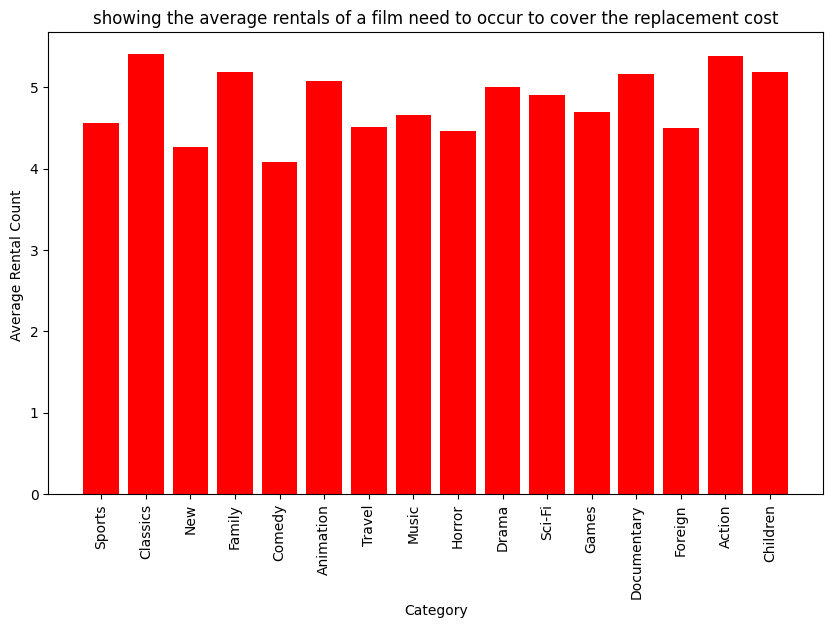

In [15]:
cursor.execute("select name, avg(replacement_cost)/avg(amount) from category join film_category on category.category_id=film_category.category_id join film on film_category.film_id=film.film_id join inventory on film.film_id=inventory.film_id join rental on inventory.inventory_id= rental.inventory_id join payment on rental.rental_id=payment.rental_id group by name""")
rows = cursor.fetchall()

for row in rows:
    print(row)
df = pd.DataFrame(rows)
df.columns = ["Category","average_rental_count"]
print(df)
plt.figure(figsize=(10,6))
plt.xticks(rotation='vertical')
plt.bar(df["Category"], df["average_rental_count"],color ='red') 
plt.xlabel("Category")
plt.ylabel("Average Rental Count ")
plt.title("showing the average rentals of a film need to occur to cover the replacement cost")
plt.show() 



# top movies per store

In [16]:
cursor.execute("select  title,store_id,count(rental_id) as rental_count from film  inner join inventory on film.film_id=inventory.film_id inner join rental on inventory.inventory_id=rental.inventory_id where store_id=1 group by title, store_id order by rental_count desc limit 20 ;")
rows = cursor.fetchall()

for row in rows:
    print(row)
df = pd.DataFrame(rows)
df.columns = ["film1","store","Rental_Count1"]
print(df)




('LOVE SUICIDES', 1, 20)
('JUGGLER HARDLY', 1, 18)
('MADNESS ATTACKS', 1, 18)
('BARBARELLA STREETCAR', 1, 18)
('WHALE BIKINI', 1, 18)
('VELVET TERMINATOR', 1, 18)
('VIDEOTAPE ARSENIC', 1, 18)
('MOVIE SHAKESPEARE', 1, 18)
('YENTL IDAHO', 1, 17)
('HOMICIDE PEACH', 1, 17)
('WIFE TURN', 1, 17)
('SCALAWAG DUCK', 1, 17)
('PULP BEVERLY', 1, 17)
('HORN WORKING', 1, 17)
('BUCKET BROTHERHOOD', 1, 17)
('MASK PEACH', 1, 17)
('WAIT CIDER', 1, 17)
('EAGLES PANKY', 1, 17)
('FACTORY DRAGON', 1, 17)
('MASSACRE USUAL', 1, 17)
                   film1  store  Rental_Count1
0          LOVE SUICIDES      1             20
1         JUGGLER HARDLY      1             18
2        MADNESS ATTACKS      1             18
3   BARBARELLA STREETCAR      1             18
4           WHALE BIKINI      1             18
5      VELVET TERMINATOR      1             18
6      VIDEOTAPE ARSENIC      1             18
7      MOVIE SHAKESPEARE      1             18
8            YENTL IDAHO      1             17
9         HOMICI

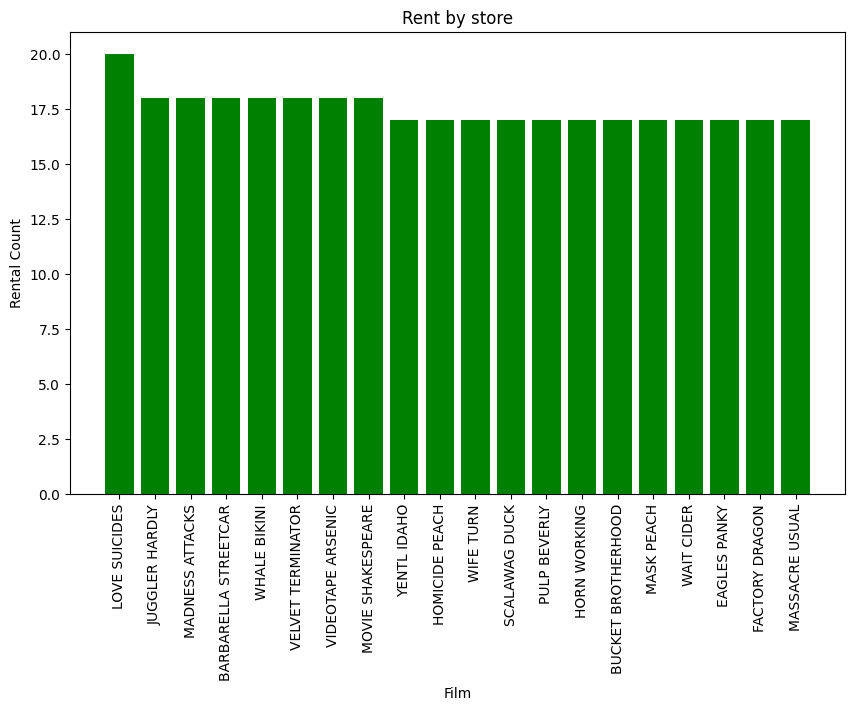

In [17]:
plt.figure(figsize=(10,6))
plt.xticks(rotation='vertical')
plt.bar(df["film1"], df["Rental_Count1"], color ='green')

plt.xlabel("Film")
plt.ylabel("Rental Count")
plt.title("Rent by store")
plt.show()

('IDOLS SNATCHERS', 2, 20)
('TALENTED HOMICIDE', 2, 19)
('HANGING DEEP', 2, 19)
('SALUTE APOLLO', 2, 19)
('DETECTIVE VISION', 2, 19)
('RIDGEMONT SUBMARINE', 2, 18)
('SWARM GOLD', 2, 18)
('SHOW LORD', 2, 18)
('AIRPORT POLLOCK', 2, 18)
('POLISH BROOKLYN', 2, 18)
('ENGLISH BULWORTH', 2, 18)
('RUSH GOODFELLAS', 2, 18)
('STAGECOACH ARMAGEDDON', 2, 18)
('ROBBERS JOON', 2, 18)
('JADE BUNCH', 2, 18)
('ROCKETEER MOTHER', 2, 18)
('BEACH HEARTBREAKERS', 2, 17)
('BUCKET BROTHERHOOD', 2, 17)
('GANDHI KWAI', 2, 17)
('GENTLEMEN STAGE', 2, 17)
                    film2  store  Rental_Count2
0         IDOLS SNATCHERS      2             20
1       TALENTED HOMICIDE      2             19
2            HANGING DEEP      2             19
3           SALUTE APOLLO      2             19
4        DETECTIVE VISION      2             19
5     RIDGEMONT SUBMARINE      2             18
6              SWARM GOLD      2             18
7               SHOW LORD      2             18
8         AIRPORT POLLOCK      2  

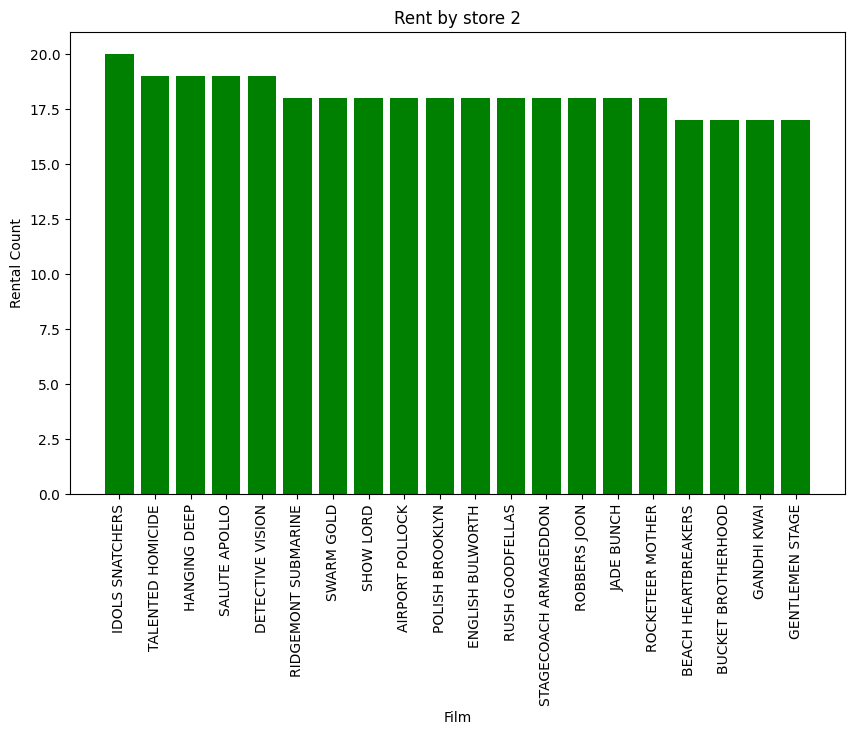

In [18]:
cursor.execute("select  title,store_id,count(rental_id) as rental_count from film  inner join inventory on film.film_id=inventory.film_id inner join rental on inventory.inventory_id=rental.inventory_id where store_id=2 group by title, store_id order by rental_count desc limit 20 ;")

rows = cursor.fetchall()

for row in rows:
    print(row)
df = pd.DataFrame(rows)
df.columns = ["film2","store","Rental_Count2"]
print(df)
plt.figure(figsize=(10,6))
plt.xticks(rotation='vertical')
plt.bar(df["film2"], df["Rental_Count2"], color ='green')

plt.xlabel("Film")
plt.ylabel("Rental Count")
plt.title("Rent by store 2")
plt.show()

# Rent by Month

In [19]:
cursor.execute("SELECT EXTRACT(MONTH FROM rental_date) as month, COUNT(*) as rental_count FROM rental GROUP BY EXTRACT(MONTH FROM rental_date) ORDER BY month")
rows = cursor.fetchall()

for row in rows:
    print(row)
    data = pd.DataFrame(rows)
data.columns = ["MONTH","Rental"]
print(data)

(Decimal('2'), 182)
(Decimal('5'), 1156)
(Decimal('6'), 2311)
(Decimal('7'), 6739)
(Decimal('8'), 5656)
  MONTH  Rental
0     2     182
1     5    1156
2     6    2311
3     7    6739
4     8    5656


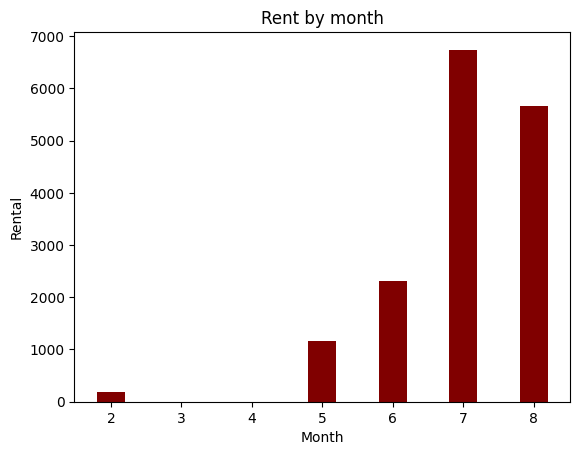

In [20]:
plt.bar(data["MONTH"], data["Rental"], color ='maroon', 
        width = 0.4)
 
plt.xlabel("Month")
plt.ylabel("Rental")
plt.title("Rent by month")
plt.show()

# Total Customers by Country

In [21]:
cursor.execute("select country, count(* ) as total_customer from customer inner join address on customer.address_id=address.address_id inner join city on address.city_id=city.city_id inner join country on city.country_id=country.country_id group by country order by total_customer desc limit 20;")
rows = cursor.fetchall()

for row in rows:
    print(row)
    data = pd.DataFrame(rows)
data.columns = ["country","total_customer"]
print(data)

('India', 60)
('China', 53)
('United States', 36)
('Japan', 31)
('Mexico', 30)
('Russian Federation', 28)
('Brazil', 28)
('Philippines', 20)
('Turkey', 15)
('Indonesia', 14)
('Nigeria', 13)
('Argentina', 13)
('South Africa', 11)
('Taiwan', 10)
('United Kingdom', 9)
('Iran', 8)
('Poland', 8)
('Venezuela', 7)
('Italy', 7)
('Germany', 7)
               country  total_customer
0                India              60
1                China              53
2        United States              36
3                Japan              31
4               Mexico              30
5   Russian Federation              28
6               Brazil              28
7          Philippines              20
8               Turkey              15
9            Indonesia              14
10             Nigeria              13
11           Argentina              13
12        South Africa              11
13              Taiwan              10
14      United Kingdom               9
15                Iran               8


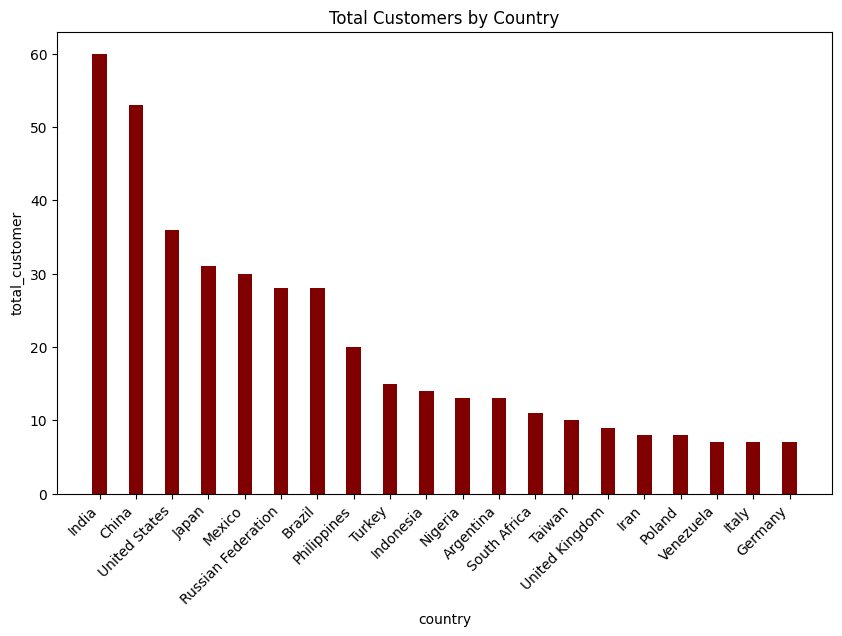

In [22]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45, ha='right')
plt.bar(data["country"], data["total_customer"], color ='maroon', 
        width = 0.4)

plt.xlabel("country")
plt.ylabel("total_customer")
plt.title("Total Customers by Country")
plt.show()

# Total Sales per customer

In [26]:
cursor.execute("""SELECT CONCAT(first_name,' ',last_name) as customer_name, 
           sum(amount) as total_sales
    from customer
    JOIN payment  ON customer.customer_id = payment.customer_id
    GROUP BY customer.customer_id
    ORDER BY total_sales DESC limit 20;""")

rows = cursor.fetchall()

for row in rows:
   
    data = pd.DataFrame(rows)
data.columns = ["Customer Name","total_sales"]
print(data)

     Customer Name total_sales
0        KARL SEAL      221.55
1     ELEANOR HUNT      216.54
2       CLARA SHAW      195.58
3   RHONDA KENNEDY      194.61
4    MARION SNYDER      194.61
5    TOMMY COLLAZO      186.62
6      WESLEY BULL      177.60
7         TIM CARY      175.61
8      MARCIA DEAN      175.58
9      ANA BRADLEY      174.66
10    JUNE CARROLL      173.63
11     LENA JENSEN      170.67
12   DIANE COLLINS      169.65
13   ARNOLD HAVENS      167.67
14     CURTIS IRBY      167.62
15        MIKE WAY      166.65
16     DAISY BATES      162.62
17   TONYA CHAPMAN      161.68
18     LOUIS LEONE      161.65
19   GORDON ALLARD      160.68


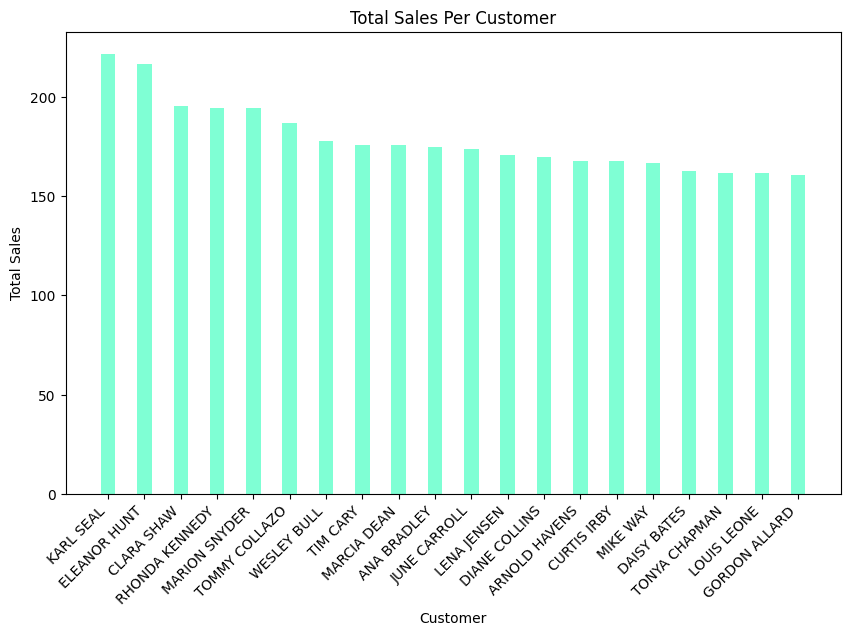

In [32]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45, ha='right')
plt.bar(data["Customer Name"], data["total_sales"], color ='aquamarine', 
        width = 0.4)

plt.xlabel("Customer")
plt.ylabel("Total Sales")
plt.title("Total Sales Per Customer")
plt.show()